ANALISIS EXPLORATORIO DE LOS DATOS (EDA) OBTENIDOS LUEGO DEL PROCESO DE ETL 

In [2]:
# Importamos las librerías necesarias para el procesamiento y visualización de los datos. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="darkgrid")
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Cargamos el nuevo dataset obtenido luego del proceso de ETL, en fomato DataFrame. 
df = pd.read_csv("Datasets/Accident_Aereos.csv", sep= ",")

In [4]:
# Visualizamos nuestro DataFrame obtenido.
df.head(3)

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...


In [5]:
# Visualizamos las dimensiones de nuestro DataFrame. 
df.shape

(4927, 12)

In [6]:
# Visualizamos una descripción general de nuestro DataFrame. Cantidad de columnas, cantidad de datos no nulos, tipo de datos de cada columna, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Fecha                   4927 non-null   object
 1   Aeropuerto_Salida       4927 non-null   object
 2   Operador                4927 non-null   object
 3   Tipo_Aeronave           4927 non-null   object
 4   Total_a_Bordo           4927 non-null   int64 
 5   Pasajeros_a_Bordo       4927 non-null   int64 
 6   Tripulacion_a_Bordo     4927 non-null   int64 
 7   Fallecidos_Totales      4927 non-null   int64 
 8   Fallecidos_Pasajeros    4927 non-null   int64 
 9   Fallecidos_Tripulacion  4927 non-null   int64 
 10  Victimas_Tierra         4927 non-null   int64 
 11  Resumen                 4927 non-null   object
dtypes: int64(7), object(5)
memory usage: 462.0+ KB


In [7]:
# Convertimos a formato datatime la columna Fecha. 
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [8]:
# Corroboramos la transformación. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   4927 non-null   datetime64[ns]
 1   Aeropuerto_Salida       4927 non-null   object        
 2   Operador                4927 non-null   object        
 3   Tipo_Aeronave           4927 non-null   object        
 4   Total_a_Bordo           4927 non-null   int64         
 5   Pasajeros_a_Bordo       4927 non-null   int64         
 6   Tripulacion_a_Bordo     4927 non-null   int64         
 7   Fallecidos_Totales      4927 non-null   int64         
 8   Fallecidos_Pasajeros    4927 non-null   int64         
 9   Fallecidos_Tripulacion  4927 non-null   int64         
 10  Victimas_Tierra         4927 non-null   int64         
 11  Resumen                 4927 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(4)
memory

In [9]:
# Visualizamos una descripción estadística de nuestro DataFrame. 
df.describe()

,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra
count,4927.000000,4927.000000,4927.000000,4927.000000,4927.000000,4927.000000,4927.000000
mean,31.369393,26.505176,4.513294,22.454435,18.584128,3.572559,1.716460
std,45.693692,43.448477,3.695167,35.197706,33.579379,3.116815,55.698974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000
75%,35.000000,29.000000,6.000000,25.000000,20.500000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


In [10]:
# Corroboramos los valores extremos, atípicos, que se visualizan a simple vista con los correspondientes valores del registro completo para
# dicha fila. Además también corroboramos el suceso descripto con las estadísticas publicadas en el sitio web de Aviation Satefy Network.
fila = df.loc[df["Total_a_Bordo"] == 644]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
2839,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,644,614,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...


In [11]:
fila = df.loc[df["Tripulacion_a_Bordo"] == 83]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
346,1935-02-12,"Off Point Sur, Californiia",Military - US Navy,Goodyear-Zeppelin U.S.S. Macon (airship),83,0,83,2,0,2,0,The airship suffered structural failure in a s...


In [12]:
fila = df.loc[df["Fallecidos_Tripulacion"] == 43]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
56,1921-08-24,"River Humber, England",Military - Royal Airship Works,Royal Airship Works ZR-2 (airship),49,0,49,43,0,43,1,Crashed due to structural failure followed by ...


In [13]:
# Definimos el período de análisis que incluye nuestro DataFrame, según los datos de la columna Fecha (mínimo y máximo). 
print("El período de tiempo analizado es", df["Fecha"].min(), "-", df["Fecha"].max())

El período de tiempo analizado es 1908-09-17 00:00:00 - 2021-07-06 00:00:00


In [14]:
# Realizamos la correción de interpretación del módulo float por numpy. Para evitar error de interpretación. 
np.float = float

1- Análisis univariado de las variables en estudio. 

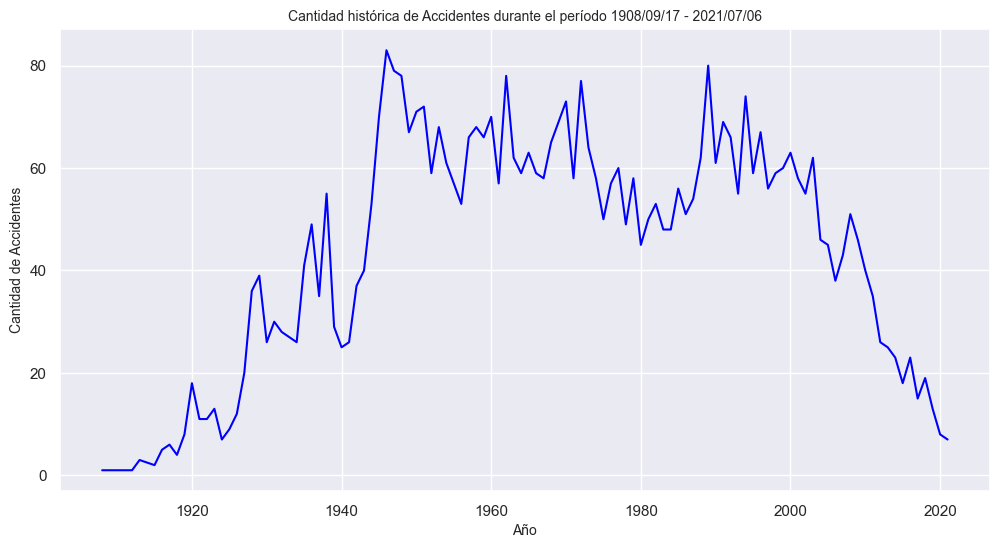

In [15]:
# Visualizamos la cantidad de accidentes a lo largo de los años analizados. 

accidentes_por_anio = df.groupby(df["Fecha"].dt.year)["Fecha"].count().reset_index(name="Cantidad")

plt.figure(figsize=(12, 6))
sns.lineplot(data=accidentes_por_anio, x="Fecha", y="Cantidad", color= "blue")
plt.xlabel("Año", fontsize=10)
plt.ylabel("Cantidad de Accidentes", fontsize=10)
plt.title("Cantidad histórica de Accidentes durante el período 1908/09/17 - 2021/07/06", fontsize= 10)
plt.show()


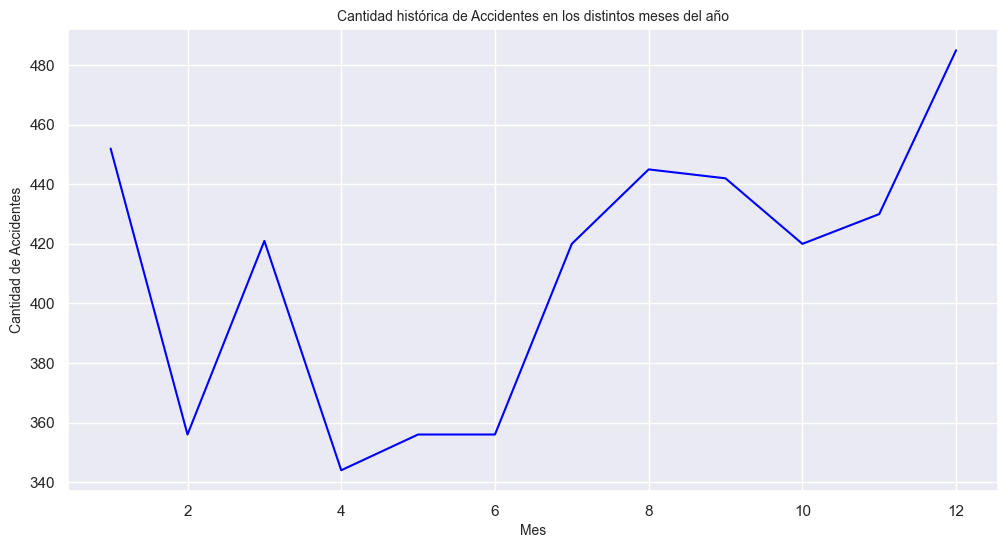

In [16]:
# Visualizamos la cantidad histórica de accidentes en los distintos meses del año.

accidentes_por_mes = df.groupby(df["Fecha"].dt.month)["Fecha"].count().reset_index(name="Cantidad")

plt.figure(figsize=(12, 6))
sns.lineplot(data=accidentes_por_mes, x="Fecha", y="Cantidad", color= "blue")
plt.xlabel("Mes", fontsize=10)
plt.ylabel("Cantidad de Accidentes", fontsize=10)
plt.title("Cantidad histórica de Accidentes en los distintos meses del año", fontsize=10)
plt.show()

Se observa un incremento histórico del número de accidentes en el mes de diciembre.

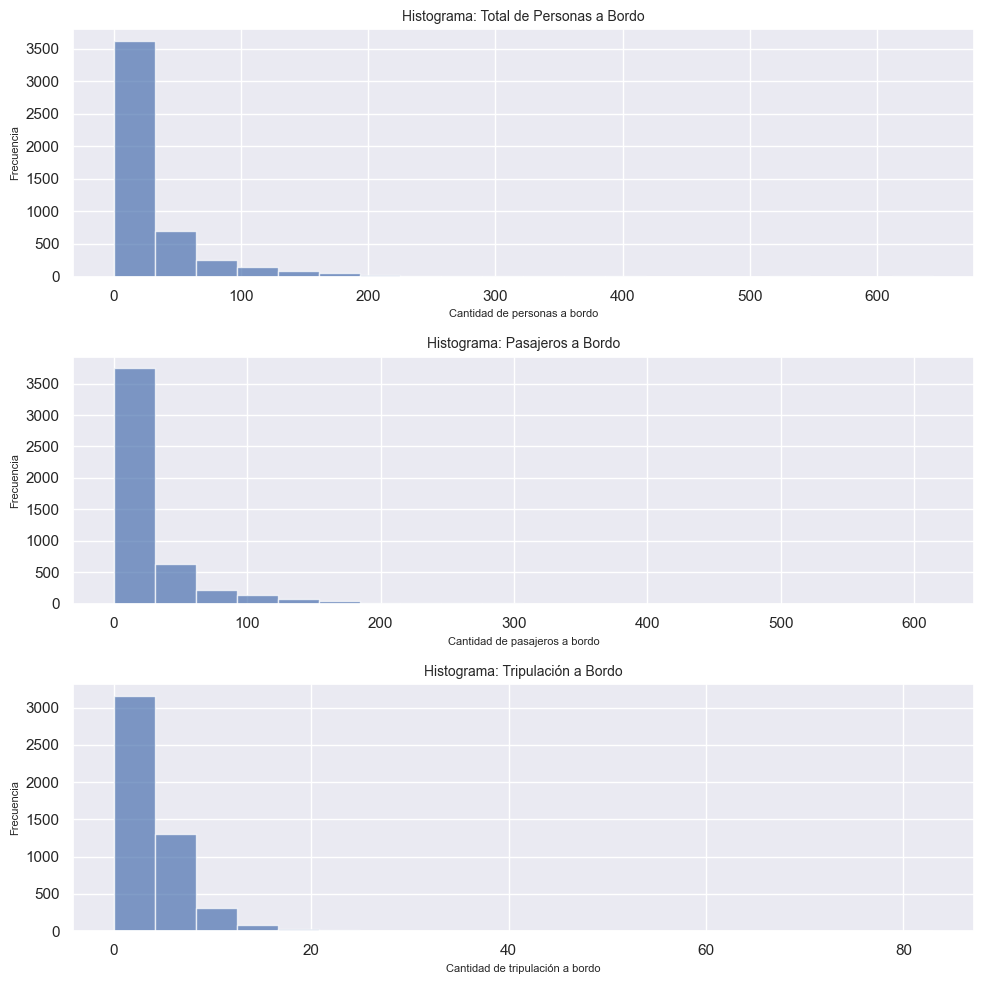

In [17]:
# Visualizamos la distribucion de frecuencias de las variables Total_a_Bordo, Pasajeros_a_Bordo, Tripulacion_a_Bordo, Fallecidos_Totales, Fallecidos_Pasajeros, Fallecidos_Tripulacion, Victimas_Tierra.

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))


sns.distplot(df['Total_a_Bordo'], kde=False, bins=20, hist_kws={'alpha': 0.7}, ax=ax1)
ax1.set_title('Histograma: Total de Personas a Bordo', fontsize=10)
ax1.set_xlabel('Cantidad de personas a bordo', fontsize=8)
ax1.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Pasajeros_a_Bordo'], kde=False, bins=20, hist_kws={'alpha': 0.7}, ax=ax2)
ax2.set_title('Histograma: Pasajeros a Bordo', fontsize=10)
ax2.set_xlabel('Cantidad de pasajeros a bordo', fontsize=8)
ax2.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Tripulacion_a_Bordo'], kde=False, bins=20, hist_kws={'alpha': 0.7}, ax=ax3)
ax3.set_title('Histograma: Tripulación a Bordo', fontsize=10)
ax3.set_xlabel('Cantidad de tripulación a bordo', fontsize=8)
ax3.set_ylabel('Frecuencia', fontsize=8)


plt.tight_layout()

plt.show()


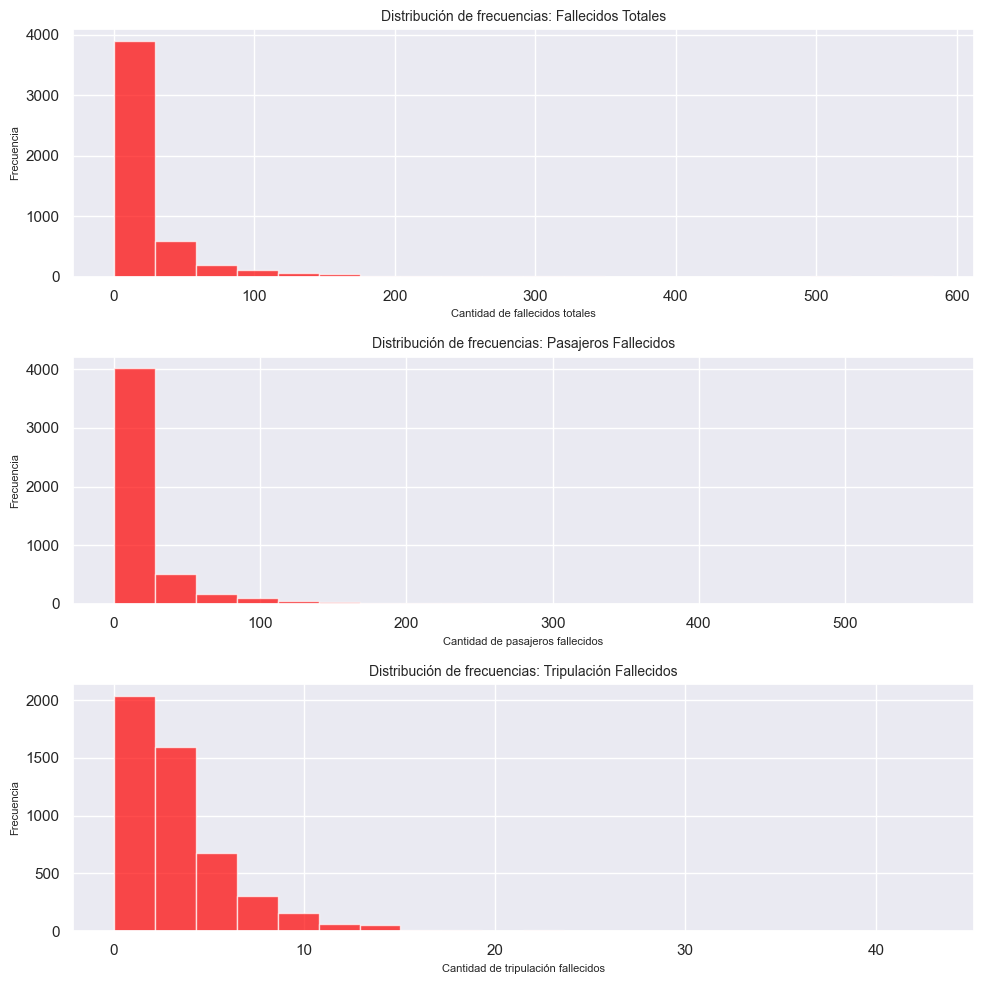

In [18]:
# Continuamos con la visualización la distribucion de frecuencias de las variables.

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))


sns.distplot(df['Fallecidos_Totales'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red', ax=ax1)
ax1.set_title('Distribución de frecuencias: Fallecidos Totales', fontsize=10)
ax1.set_xlabel('Cantidad de fallecidos totales', fontsize=8)
ax1.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Fallecidos_Pasajeros'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red', ax=ax2)
ax2.set_title('Distribución de frecuencias: Pasajeros Fallecidos', fontsize=10)
ax2.set_xlabel('Cantidad de pasajeros fallecidos', fontsize=8)
ax2.set_ylabel('Frecuencia', fontsize=8)

sns.distplot(df['Fallecidos_Tripulacion'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red', ax=ax3)
ax3.set_title('Distribución de frecuencias: Tripulación Fallecidos', fontsize=10)
ax3.set_xlabel('Cantidad de tripulación fallecidos', fontsize=8)
ax3.set_ylabel('Frecuencia', fontsize=8)


plt.tight_layout()

plt.show()


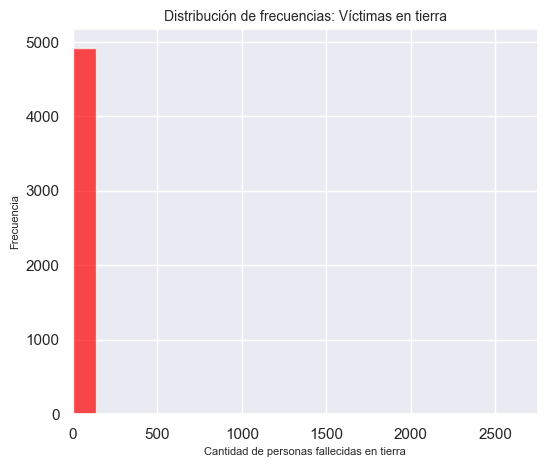

In [19]:
plt.figure(figsize=(6,5))
ax = sns.distplot(df['Victimas_Tierra'], kde=False, bins=20, hist_kws={'alpha': 0.7}, color='red')
plt.title('Distribución de frecuencias: Víctimas en tierra', fontsize=10)
plt.xlabel('Cantidad de personas fallecidas en tierra', fontsize=8)
plt.ylabel('Frecuencia', fontsize=8)
plt.xlim(0,2750)
plt.show()

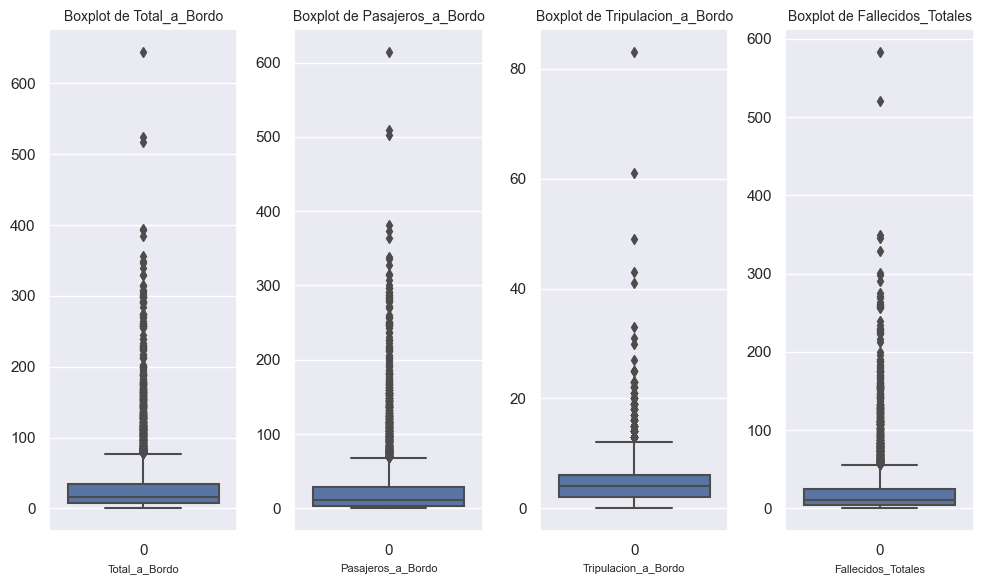

In [20]:
# Visualizamos gráficas boxplot para una mejor comprensión de los puntos atípicos.

numeric_columns = ["Total_a_Bordo", "Pasajeros_a_Bordo", "Tripulacion_a_Bordo", "Fallecidos_Totales"]

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 6))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f"Boxplot de {column}", fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

plt.tight_layout()
plt.show()


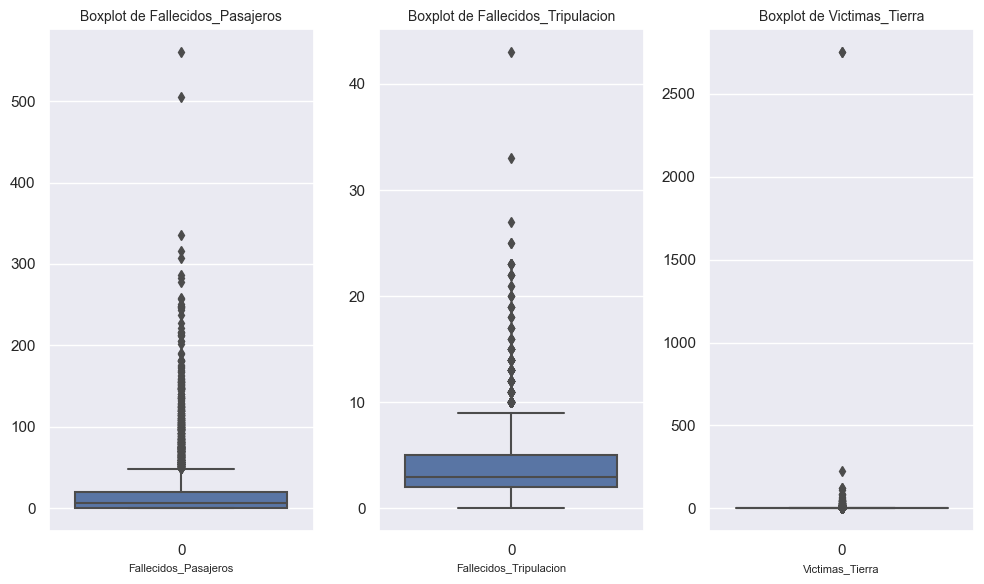

In [21]:
# Continuamos con la visualización de gráficas boxplot para una mejor comprensión de los puntos atípicos.
numeric_columns = ["Fallecidos_Pasajeros", "Fallecidos_Tripulacion", "Victimas_Tierra"]

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 6))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f"Boxplot de {column}", fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

plt.tight_layout()
plt.show()


In [22]:
# Correjimos error de interpretación del módulo object por numpy. 
np.object = object

In [23]:
# Importamos la librería wordcloud para realizar una visualización general de la columna resumen y advertir las palabras con mayor frecuencia en dicha columna.
from wordcloud import WordCloud, STOPWORDS

In [24]:
# Convertimos la columna Resumen de nuestro DataFrame en una cadena de texto. Nos devuelve una representación en cadena de texto de los elementos de la columna.
text = str(df.Resumen.tolist())

In [25]:
# Inicializamos un conjunto de palabras vacías (stopwords) y agrega aircraft y plane al conjunto.
stopwords = set(STOPWORDS)
stopwords.add("aircraft")
stopwords.add("plane")

In [26]:
#Creamos una instancia de WordCloud con la configuración especificada y genera una representación de nube de palabras basada en el texto dado.
"""
Parámetros:
- background_color (str): El color de fondo de la nube de palabras.
- max_words (int): El número máximo de palabras que se mostrarán en la nube de palabras.
- stopwords (set): Un conjunto de palabras vacías (stopwords) a ser excluidas de la nube de palabras.
- text (str): El texto a partir del cual se generará la nube de palabras.
"""

wc = WordCloud(background_color="white", max_words=5000,
               stopwords=stopwords)
wc.generate(text)

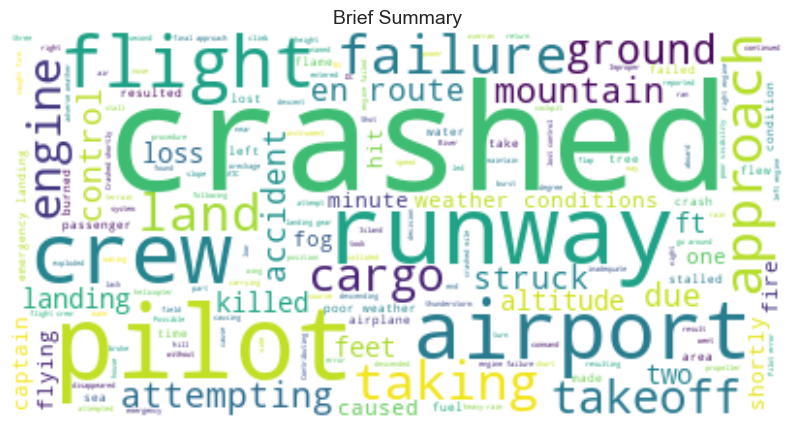

In [27]:
# Visualizamos nuestra bube de palabras creada anteriormente. 
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Brief Summary", loc="Center", fontsize=14)

plt.show()

2- Análisis bivariado de las variables en estudio. 

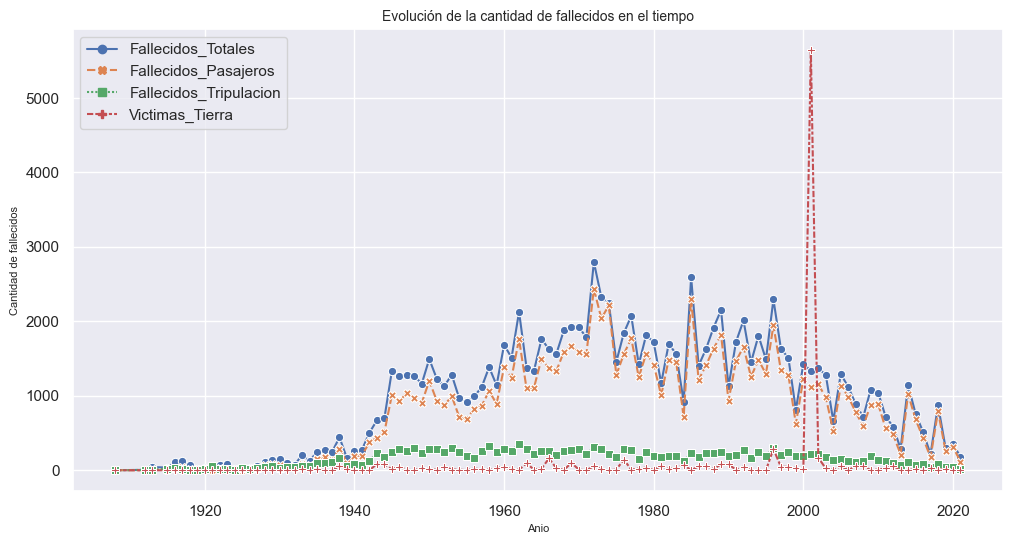

In [28]:
# Visualizamos la cantidad de fallecidos totales a lo largo de los años teniendo en cuenta a qué grupo pertenecen. 
df_fallecidos = df.groupby(df["Fecha"].dt.year)[["Fallecidos_Totales", "Fallecidos_Pasajeros", "Fallecidos_Tripulacion", "Victimas_Tierra"]].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fallecidos, markers=True)

plt.title("Evolución de la cantidad de fallecidos en el tiempo", fontsize=10)
plt.xlabel("Anio", fontsize=8)
plt.ylabel("Cantidad de fallecidos", fontsize=8)

plt.show()


In [29]:
# Corroboramos el valor máximo observado, ya que no coincide con el valor máximo de la descripción general del dataframe,
# y tampoco coincide con el reporte  oficial de dicho suceso. 
total_victimas_2001 = df[df["Fecha"].dt.year == 2001]["Victimas_Tierra"].sum()
print("Total de víctimas en tierra en 2001:", total_victimas_2001)


Total de víctimas en tierra en 2001: 5641


In [30]:
# corroboramos que el registro de víctimas en tierra aparece por duplicado, ya que el suceso hace referencia a dos accidentes que tuvieron impacto en el mismo lugar geografico.
# El total de 2750 víctimas en tierra es la sumatoria de las víctimas en tierra debidas a los dos accidentes. También lo corroboramos con el reporte ofical de dichos sucesos para mayor seguridad.
fila = df.loc[df["Fecha"] == "2001-09-11"]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
4265,2001-09-11,"Arlington, Virginia.",American Airlines,Boeing B-757-223,64,58,6,64,58,6,125,The aircraft was hijacked after taking off fro...
4266,2001-09-11,"New York City, New York",American Airlines,Boeing 767-223ER,92,81,11,92,81,11,2750,The aircraft was hijacked shortly after it lef...
4267,2001-09-11,"New York City, New York",United Air Lines,Boeing B-767-222,65,56,9,65,56,9,2750,The aircraft was hijacked shortly after it lef...
4268,2001-09-11,"Shanksville, Pennsylvania",United Air Lines,Boeing B-757-222,44,37,7,44,37,7,0,The aircraft was hijacked after taking off fro...


In [31]:
# Reemplazamos uno de los valores por un valor nulo, ya que se está arrojando un dato erróneo, el estar duplicado este valor. 
fila_especifica = 4266  
columna_especifica = df.columns.get_loc("Victimas_Tierra")
df.iloc[fila_especifica, columna_especifica] = np.nan

In [32]:
# Corroboramos el reemplazo realizado anteriormente. 
total_victimas_2001 = df[df["Fecha"].dt.year == 2001]["Victimas_Tierra"].sum()
print("Total de víctimas en tierra en 2001:", total_victimas_2001)


Total de víctimas en tierra en 2001: 2891.0


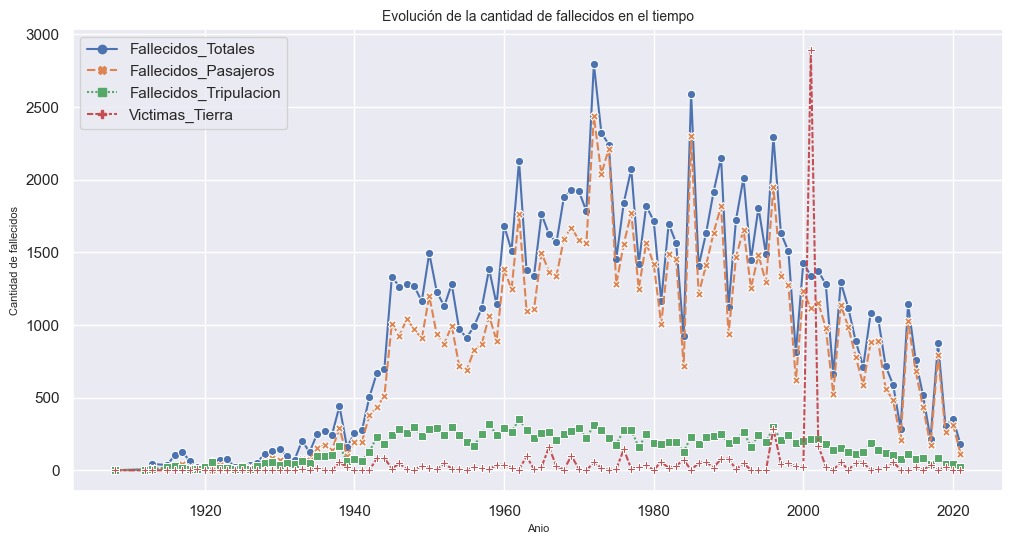

In [33]:
# Vizualizamos nuevamente la gráfica anterior con la modificaión explicada anteriormente. 
df_fallecidos = df.groupby(df["Fecha"].dt.year)[["Fallecidos_Totales", "Fallecidos_Pasajeros", "Fallecidos_Tripulacion", "Victimas_Tierra"]].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fallecidos, markers=True)

plt.title("Evolución de la cantidad de fallecidos en el tiempo", fontsize=10)
plt.xlabel("Anio", fontsize=8)
plt.ylabel("Cantidad de fallecidos", fontsize=8)

plt.show()


In [34]:
# Corroboramos el cambio en los registros del DataFrame.
fila = df.loc[df["Fecha"] == "2001-09-11"]
fila

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen
4265,2001-09-11,"Arlington, Virginia.",American Airlines,Boeing B-757-223,64,58,6,64,58,6,125.0,The aircraft was hijacked after taking off fro...
4266,2001-09-11,"New York City, New York",American Airlines,Boeing 767-223ER,92,81,11,92,81,11,NaN,The aircraft was hijacked shortly after it lef...
4267,2001-09-11,"New York City, New York",United Air Lines,Boeing B-767-222,65,56,9,65,56,9,2750.0,The aircraft was hijacked shortly after it lef...
4268,2001-09-11,"Shanksville, Pennsylvania",United Air Lines,Boeing B-757-222,44,37,7,44,37,7,0.0,The aircraft was hijacked after taking off fro...


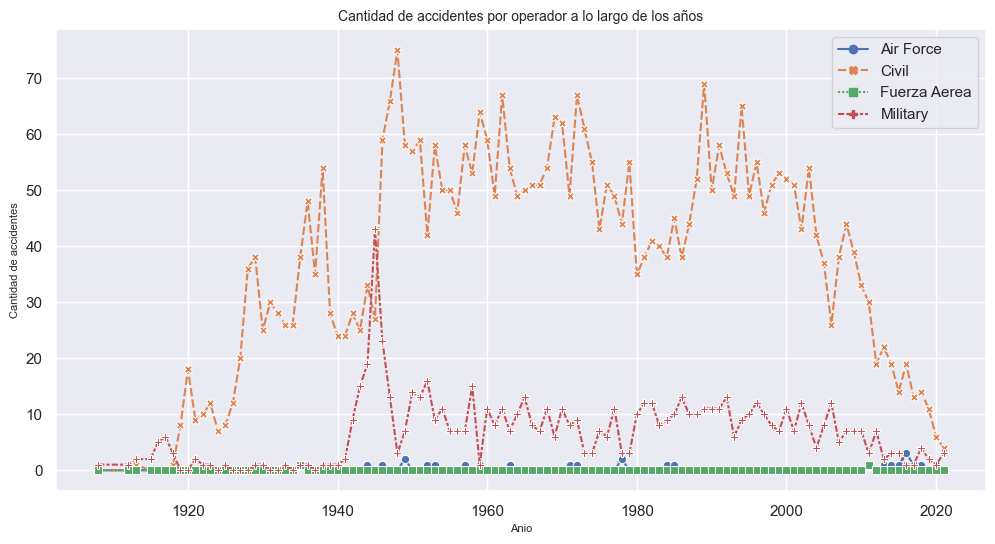

In [35]:
# Visualizamos la evolución de la cantidad de accidentes a lo largo del período estudiado, teniendo en cuenta cuatro grandes grupos de
# operadores "Militar, Fuerza Aerea, Air Force, Civil" 
df["Operador"] = df["Operador"].astype(str)

df["Operador_Categoria"] = df["Operador"].apply(lambda x: "Military" if "military" in x.lower() else
                                                  ("Fuerza Aerea" if "fuerza aerea" in x.lower() else
                                                   ("Air Force" if "air force" in x.lower() else "Civil")))


df.loc[df["Operador_Categoria"].isin(["Military", "Fuerza Aerea", "Air Force"]), "Operador_Categoria"] = "Civil"


df["Operador_Detalle"] = df["Operador"].apply(lambda x: "Military" if "military" in x.lower() else
                                              "Fuerza Aerea" if "fuerza aerea" in x.lower() else
                                              "Air Force" if "air force" in x.lower() else "Civil")

df_agrupado = df.groupby([df["Fecha"].dt.year, "Operador_Detalle"]).size().unstack().fillna(0)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agrupado, markers=True)


plt.title("Cantidad de accidentes por operador a lo largo de los años", fontsize=10)
plt.xlabel("Anio", fontsize=8)
plt.ylabel("Cantidad de accidentes", fontsize=8)


plt.show()


In [36]:
# Creamos una nueva columna en nuestro DataFrame que contenga las cuatro grandes clasificaciones que visualizamos anteriormente. 
df["Operador_Categoria"] = df["Operador"].apply(lambda x: "Military" if "military" in x.lower() else
                                                  ("Fuerza Aerea" if "fuerza aerea" in x.lower() else
                                                   ("Air Force" if "air force" in x.lower() else "Civil")))

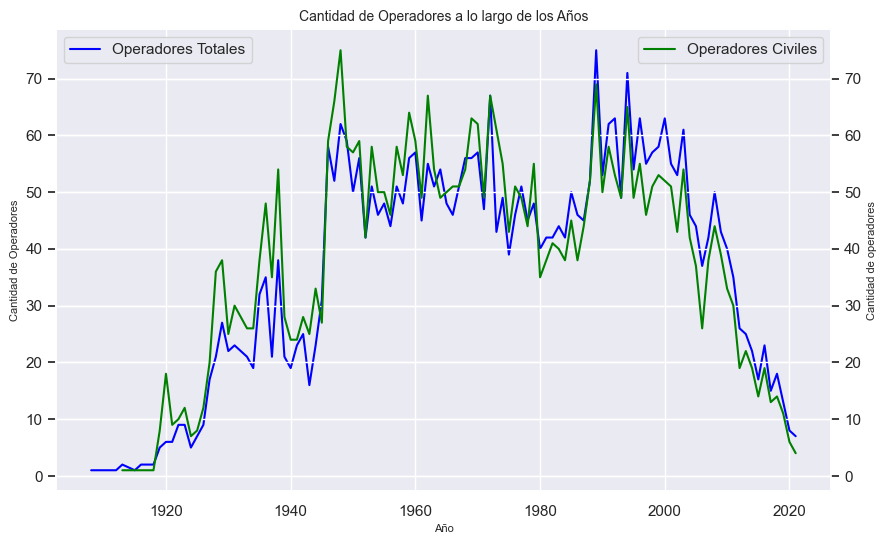

In [38]:
# Visualizamos la evolución de la cantidad de operadores a lo largo de lo años, según dos grandes clasificaciones "Militar y Civil".  

df["Año"] = df["Fecha"].dt.year
data1 = df.groupby("Año")["Operador"].nunique().reset_index()
sns.set(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=data1, x="Año", y="Operador", ax=ax1, label="Operadores Totales", color="blue")
ax1.set_title("Cantidad de Operadores a lo largo de los Años", fontsize=10)
ax1.set_xlabel("Año", fontsize=8)
ax1.set_ylabel("Cantidad de Operadores", fontsize=8)

df["Operador"] = df["Operador"].astype(str)
df["Operador_Categoria"] = df["Operador"].apply(lambda x: "Military" if "military" in x.lower() else
                                                ("Fuerza Aerea" if "fuerza aerea" in x.lower() else
                                                 ("Air Force" if "air force" in x.lower() else "Civil")))

df["Operador_Detalle"] = df["Operador"].apply(lambda x: "Fuerza Aerea" if "fuerza aerea" in x.lower() else
                                              ("Air Force" if "air force" in x.lower() else "Civil"))

df_agrupado = df[df["Operador_Categoria"] == "Civil"].groupby(df["Fecha"].dt.year).size()
ax2 = ax1.twinx()
sns.lineplot(data=df_agrupado, markers=True, ax=ax2, label="Operadores Civiles", color="green")
ax2.set_ylabel("Cantidad de operadores", fontsize=8)


ax1.legend(loc="upper left")
ax2.legend(loc="upper right")


plt.show()


3- Análisis Multivariado de las variables numéricas. 

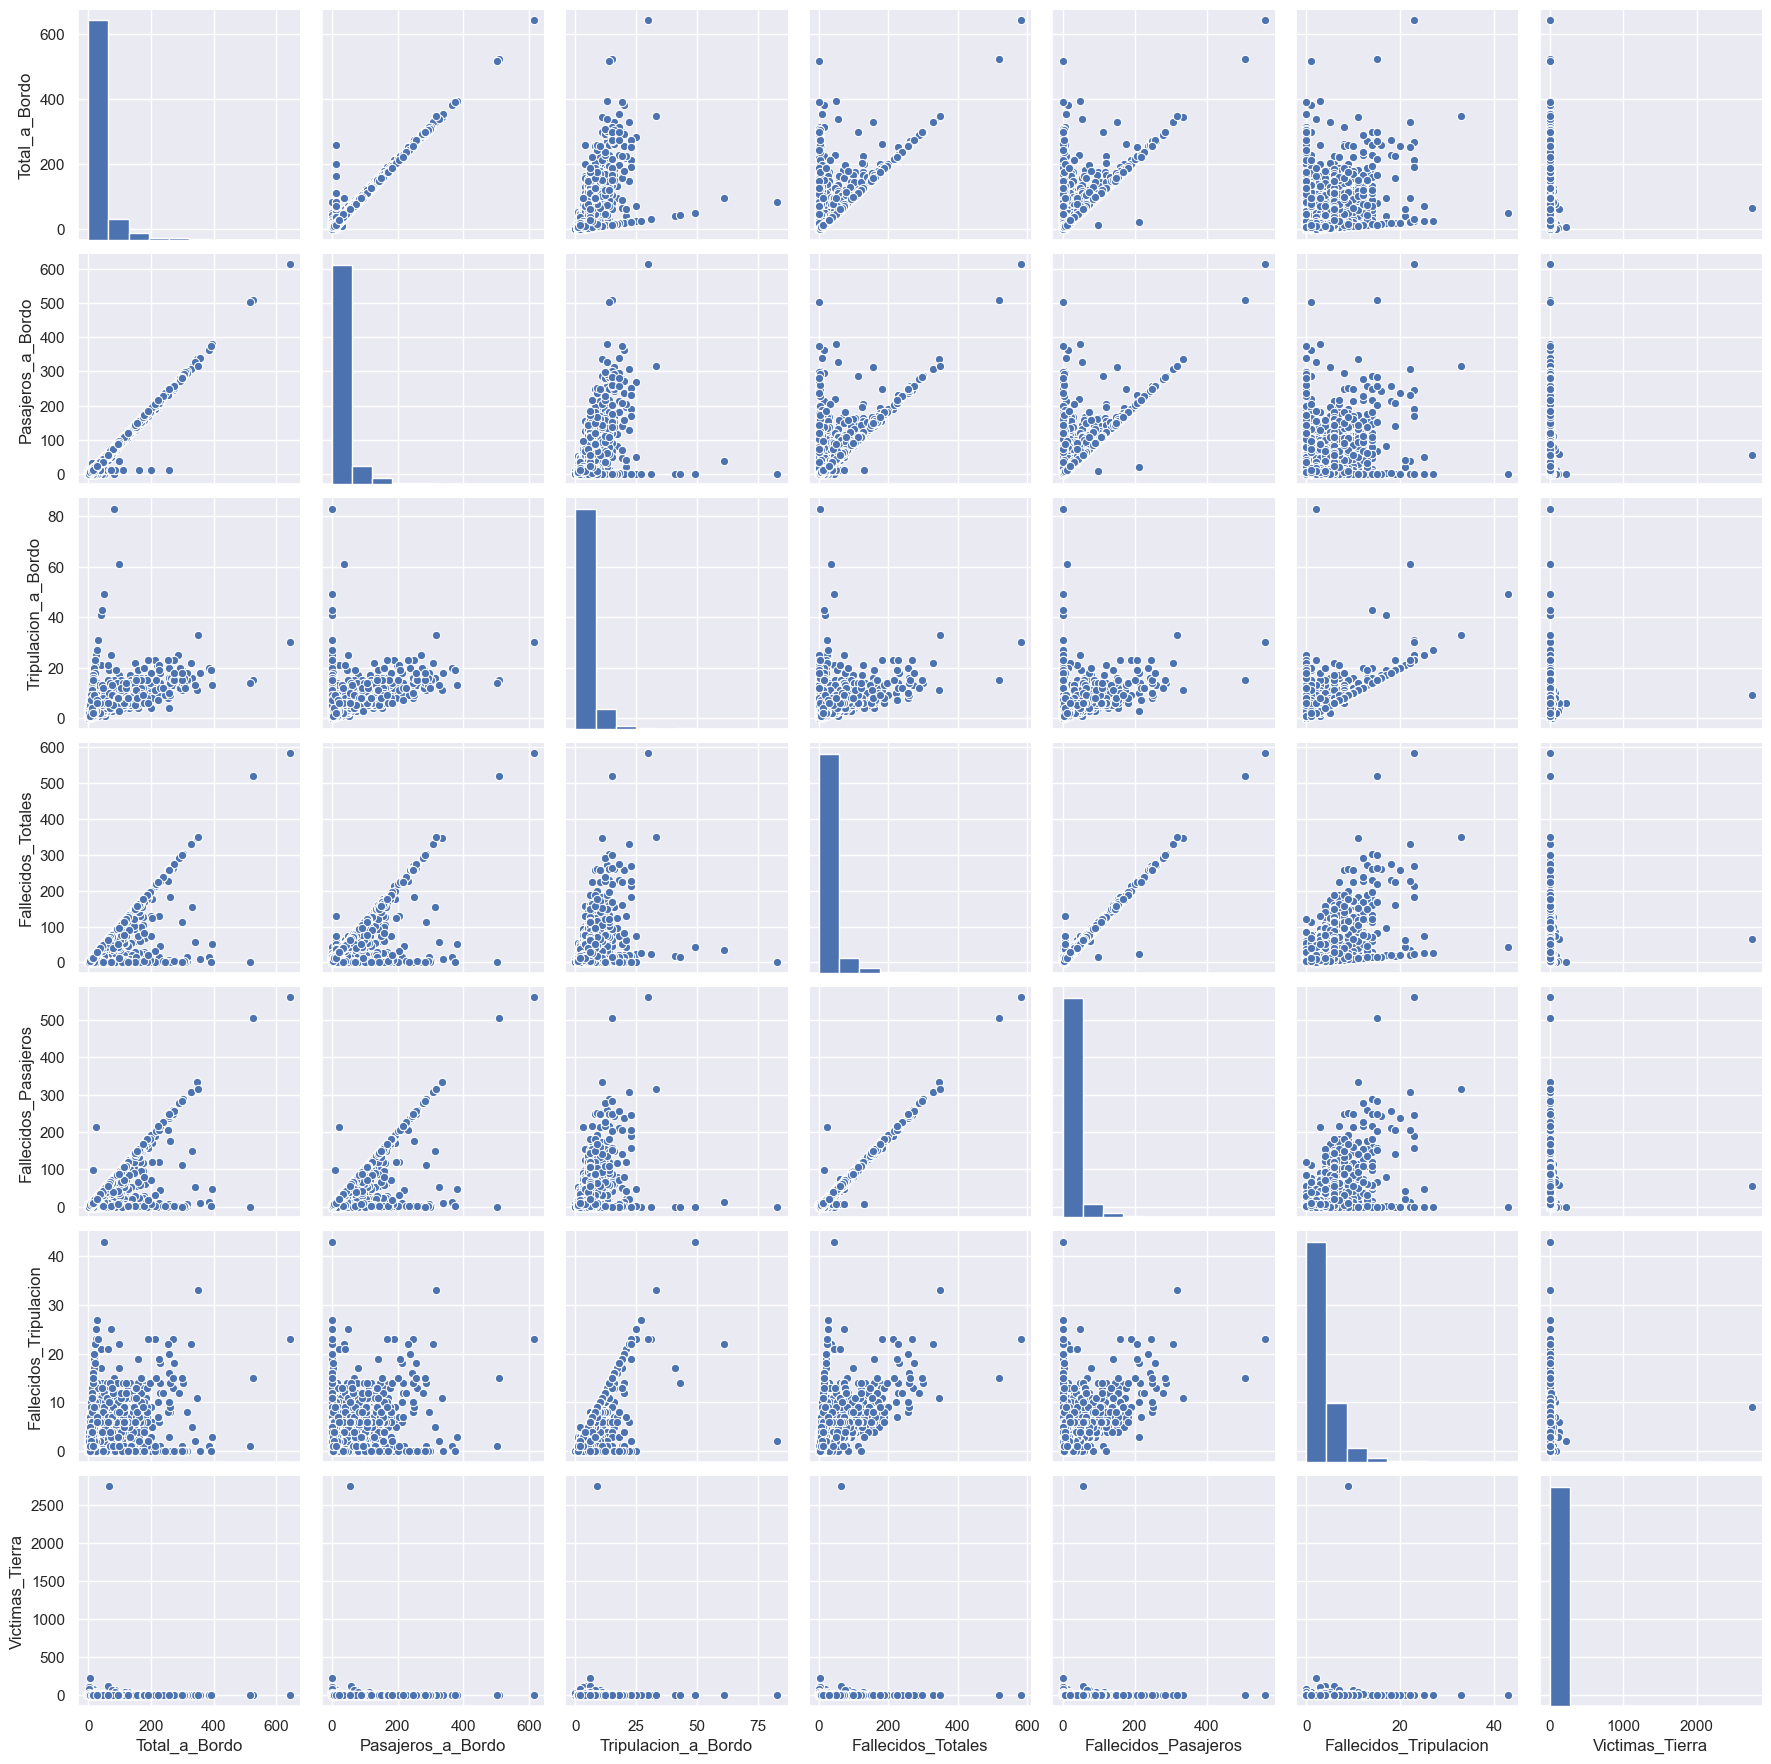

In [39]:
# Visualizamos la gráfica pairplot donde podemos observar las correlaciones entre las variables definidas.
columnas_num = ["Total_a_Bordo", "Pasajeros_a_Bordo", "Tripulacion_a_Bordo", "Fallecidos_Totales", "Fallecidos_Pasajeros", "Fallecidos_Tripulacion", "Victimas_Tierra"]

sns.pairplot(data=df[columnas_num])
plt.show()

In [41]:
# Correjimos la interpretación del módulo booleano de numpy para que no genere error de interpretación. 
np.bool = bool

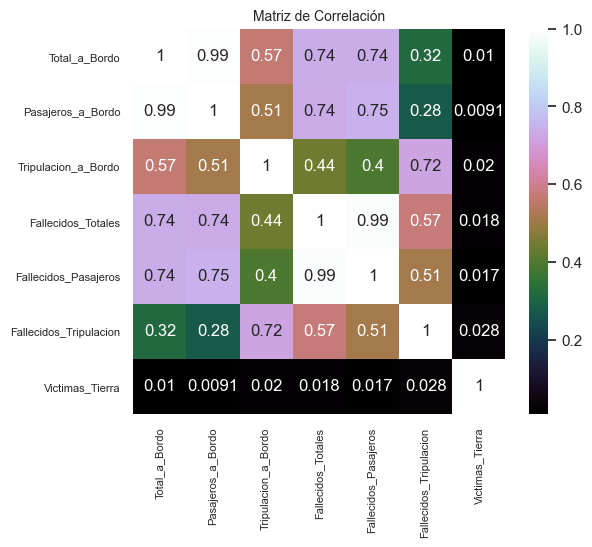

In [42]:
# Calculamos y vizualizamos una matriz de correlación entre las variables numéricas de interés. 
correlation_matrix = df[columnas_num].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="cubehelix")

plt.title("Matriz de Correlación", fontsize=10)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)

plt.show()


In [43]:
# Añadimos la columna "clasificación" utilizando np.where() para poder hacer una distinción entre accidentes con víctimas fatales y no fatales,
# que será de utilidad en la definición de una posible KPI.
df["Clasificación"] = np.where(df["Fallecidos_Totales"] > 0, "Fatal", "No Fatal")

In [44]:
# Añadimos la columna "sobrevivientes" que será de uitlidad para el cálculo de una posible KPI.
df["Sobrevivientes"] = df["Total_a_Bordo"] - df["Fallecidos_Totales"]

In [45]:
# Añadimos la columna "cantidad" para poder contabilizar la cantidad de accidentes con una función de agregfación en la herramienta visual (Power BI) donde 
# desarrollar el dashboard. 
df["Cantidad"] = 1

In [46]:
# Corroboramos la creación de las columnas mencionadas anteriormente. 
df.head(3)

,Fecha,Aeropuerto_Salida,Operador,Tipo_Aeronave,Total_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Fallecidos_Totales,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Victimas_Tierra,Resumen,Operador_Categoria,Operador_Detalle,Año,Clasificación,Sobrevivientes,Cantidad
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,1,1,1,0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,Civil,1908,Fatal,1,1
1,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,0,5,5,0,5,0.0,First U.S. dirigible Akron exploded just offsh...,Military,Civil,1912,Fatal,0,1
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,0,1,1,0,1,0.0,The first fatal airplane accident in Canada oc...,Civil,Civil,1913,Fatal,0,1


In [41]:
# Exportamos el nuevo conjunto de datos en formato de archivo csv, para ser consumido en la herramienta visual (Power BI) para la creación del dashboard interactivo.
df.to_csv("Data.csv", index=False)